In [1]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_Irish_place_names_in_other_countries"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Initialize lists to store place names and headings
    place_names = []
    headings = []
    
    # Find all elements with class 'div-col'
    div_cols = soup.find_all('div', class_='div-col')
    
    # Iterate through each 'div-col' and extract place names
    for div in div_cols:
        # Each 'div-col' may contain several place names
        for item in div.find_all('li'):
            place_name = item.get_text(strip=True)
            place_names.append(place_name)
    
    # Find all headings with class 'mw-heading mw-heading3'
    heading_tags = soup.find_all('span', class_='mw-heading mw-heading3')
    
    # Extract the text from each heading
    for heading in heading_tags:
        headings.append(heading.get_text(strip=True))
    
    # Print the list of place names
    print("Place Names:")
    for name in place_names:
        print(name)
    
    # Print the list of headings
    print("\nHeadings:")
    for heading in headings:
        print(heading)

else:
    print("Failed to retrieve the page. Status code:", response.status_code)


Place Names:
Antrim, New Hampshire
Antrim, Nova Scotia
Antrim, Ohio
Antrim, Pennsylvania
Antrim County, Michigan
Antrim Township, Pennsylvania
Antrim Township, Michigan
Antrim Township, Watonwan County, Minnesota
Antrim Township, Wyandot County, Ohio
Ardmore, Alberta
Ardmore, New Zealand
Ardmore, Alabama
Ardmore, Atlanta, Georgia(Neighborhood)
Ardmore Historic District, Winston-Salem, North Carolina(Neighborhood)
Ardmore, Indiana
Ardmore, Maryland
Ardmore, Missouri
Ardmore, Oklahoma
Ardmore, Pennsylvania
Ardmore, South Dakota
Ardmore, Tennessee
Athlone, California
Athlone, Cape Town
Athlone, Edmonton, Alberta(Neighborhood)
Athlone, Victoria
Athlone Park, South Africa
Avoca, Arkansas
Avoca, Florida
Avoca, Indiana
Avoca, Iowa
Avoca, Louisville, Kentucky(Neighborhood)
Avoca, Minnesota
Avoca, Nebraska
Avoca, New South Wales
Avoca, New York
Avoca, New Zealand
Avoca, Pennsylvania
Avoca, Queensland
Avoca, South Africa
Avoca, Tasmania
Avoca, Texas
Avoca, Victoria
Avoca, West Virginia
Avoca, Wi

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL of the Wikipedia site
base_url = "https://en.wikipedia.org"

# URL of the Wikipedia page with the list of place names
url = "https://en.wikipedia.org/wiki/List_of_Irish_place_names_in_other_countries"

# Sending a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all divs with class 'div-col' to get the place names and links
place_links = []
div_cols = soup.find_all('div', class_='div-col')
for div in div_cols:
    places = div.find_all('li')  # Get list items
    for place in places:
        link = place.find('a')
        if link:
            place_name = link.text
            # Construct the full URL correctly
            place_url = base_url + link['href']
            place_links.append((place_name, place_url))

# Function to extract coordinates from the place page
def extract_coordinates(place_url):
    response = requests.get(place_url)
    place_soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the coordinates in the infobox, usually represented as a link
    infobox = place_soup.find('table', class_='infobox')
    if infobox:
        coords_link = infobox.find('span', class_='geo')
        if coords_link:
            coordinates = coords_link.text
            return coordinates
    return None

# List to store results
results = []

# Iterate through the place links and extract coordinates
for place_name, place_url in place_links:
    try:
        coordinates = extract_coordinates(place_url)
        results.append({'Place Name': place_name, 'Coordinates': coordinates if coordinates else 'Not found'})
    except Exception as e:
        print(f"Error fetching {place_name}: {e}")
        results.append({'Place Name': place_name, 'Coordinates': 'Error'})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


Error fetching Calle de O'Donnell: HTTPSConnectionPool(host='en.wikipedia.orghttps', port=443): Max retries exceeded with url: //es.wikipedia.org/wiki/Calle_de_O%27Donnell (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001A0D12EDF90>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
                  Place Name          Coordinates
0      Antrim, New Hampshire  43.03083; -71.93889
1        Antrim, Nova Scotia  44.97139; -63.38250
2               Antrim, Ohio            Not found
3       Antrim, Pennsylvania  41.63389; -77.28694
4    Antrim County, Michigan        45.01; -85.18
..                       ...                  ...
851           Lismore crater            Not found
852             Louth crater        70.19; 103.24
853             Navan crater            Not found
854              Tara crater            Not found
855           Wicklow crater            Not found

[856 rows x 2 columns]


In [15]:
results_df

,Place Name,Coordinates
0,"Antrim, New Hampshire",43.03083; -71.93889
1,"Antrim, Nova Scotia",44.97139; -63.38250
2,"Antrim, Ohio",Not found
3,"Antrim, Pennsylvania",41.63389; -77.28694
4,"Antrim County, Michigan",45.01; -85.18
...,...,...
851,Lismore crater,Not found
852,Louth crater,70.19; 103.24
853,Navan crater,Not found
854,Tara crater,Not found


In [23]:
results_df.tail(15)

,Place Name,Coordinates


In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL of the Wikipedia site
base_url = "https://en.wikipedia.org"

# URL of the Wikipedia page with the list of place names
url = "https://en.wikipedia.org/wiki/List_of_Irish_place_names_in_other_countries"

# Sending a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all divs with class 'div-col' to get the place names and links
place_links = []
div_cols = soup.find_all('div', class_='div-col')
for div in div_cols:
    places = div.find_all('li')  # Get list items
    for place in places:
        link = place.find('a')
        if link:
            place_name = link.text
            # Construct the full URL correctly
            place_url = base_url + link['href']
            place_links.append((place_name, place_url))

# Function to extract coordinates from the place page
def extract_coordinates(place_url):
    response = requests.get(place_url)
    place_soup = BeautifulSoup(response.content, 'html.parser')
    
    # Try to find coordinates in the infobox first
    infobox = place_soup.find('table', class_='infobox')
    if infobox:
        coords_link = infobox.find('span', class_='geo')
        if coords_link:
            coordinates = coords_link.text
            return coordinates
    
    # If not in infobox, search the entire page using regex for decimal coordinates
    page_text = place_soup.get_text()
    decimal_pattern = re.compile(r'(-?\d{1,3}\.\d+)\s*[,;]\s*(-?\d{1,3}\.\d+)')
    match = decimal_pattern.search(page_text)
    if match:
        return f"{match.group(1)}, {match.group(2)}"
    
    return None

# List to store results
results = []
counter = 0  # Initialize counter

# Iterate through the place links and extract coordinates
for place_name, place_url in place_links:
    try:
        coordinates = extract_coordinates(place_url)
        results.append({'Place Name': place_name, 'Coordinates': coordinates if coordinates else 'Not found'})
        counter += 1  # Increment counter
        print(f"Processed {counter}/{len(place_links)}: {place_name}")
    except Exception as e:
        print(f"Error fetching {place_name}: {e}")
        results.append({'Place Name': place_name, 'Coordinates': 'Error'})
        counter += 1  # Increment counter even on error

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


Processed 1/856: Antrim, New Hampshire
Processed 2/856: Antrim, Nova Scotia
Processed 3/856: Antrim, Ohio
Processed 4/856: Antrim, Pennsylvania
Processed 5/856: Antrim County, Michigan
Processed 6/856: Antrim Township, Pennsylvania
Processed 7/856: Antrim Township, Michigan
Processed 8/856: Antrim Township, Watonwan County, Minnesota
Processed 9/856: Antrim Township, Wyandot County, Ohio
Processed 10/856: Ardmore, Alberta
Processed 11/856: Ardmore, New Zealand
Processed 12/856: Ardmore, Alabama
Processed 13/856: Ardmore, Atlanta, Georgia
Processed 14/856: Ardmore Historic District, Winston-Salem, North Carolina
Processed 15/856: Ardmore, Indiana
Processed 16/856: Ardmore, Maryland
Processed 17/856: Ardmore, Missouri
Processed 18/856: Ardmore, Oklahoma
Processed 19/856: Ardmore, Pennsylvania
Processed 20/856: Ardmore, South Dakota
Processed 21/856: Ardmore, Tennessee
Processed 22/856: Athlone, California
Processed 23/856: Athlone, Cape Town
Processed 24/856: Athlone, Edmonton, Alberta
P

In [38]:
# Show the entries where coordinates are 'Not found'
missing_coords_df = results_df[results_df['Coordinates'] == 'Not found']

# Display the DataFrame of places with missing coordinates
print("\nPlaces where coordinates could not be found:")
print(missing_coords_df)


Places where coordinates could not be found:
                                            Place Name Coordinates
167                                   Dublin, Missouri   Not found
184  Donegal Township, Washington County, Pennsylvania   Not found
219             New Ireland Province, Papua New Guinea   Not found
274                       Longford, Greater Manchester   Not found
283                               Longford, Warrington   Not found
341                        Tyrone, Morrow County, Ohio   Not found
406                                         Beechmount   Not found
596                                             Dublin   Not found
655                              Tyrone, Morrow County   Not found
684                Donegal Township, Washington County   Not found
696                                            Lisburn   Not found
768                                Castlereagh Highway   Not found
787                                         Cape Derry   Not found
841             

In [34]:
results_df.head(20)

,Place Name,Coordinates
0,"Antrim, New Hampshire",43.03083; -71.93889
1,"Antrim, Nova Scotia",44.97139; -63.38250
2,"Antrim, Ohio","40.12056, -81.35889"
3,"Antrim, Pennsylvania",41.63389; -77.28694
4,"Antrim County, Michigan",45.01; -85.18
5,"Antrim Township, Pennsylvania","39.73333, -77.71639"
6,"Antrim Township, Michigan",42.83056; -84.09556
7,"Antrim Township, Watonwan County, Minnesota",43.88417; -94.41917
8,"Antrim Township, Wyandot County, Ohio",40.77361; -83.14639
9,"Ardmore, Alberta",54.33194; -110.48278


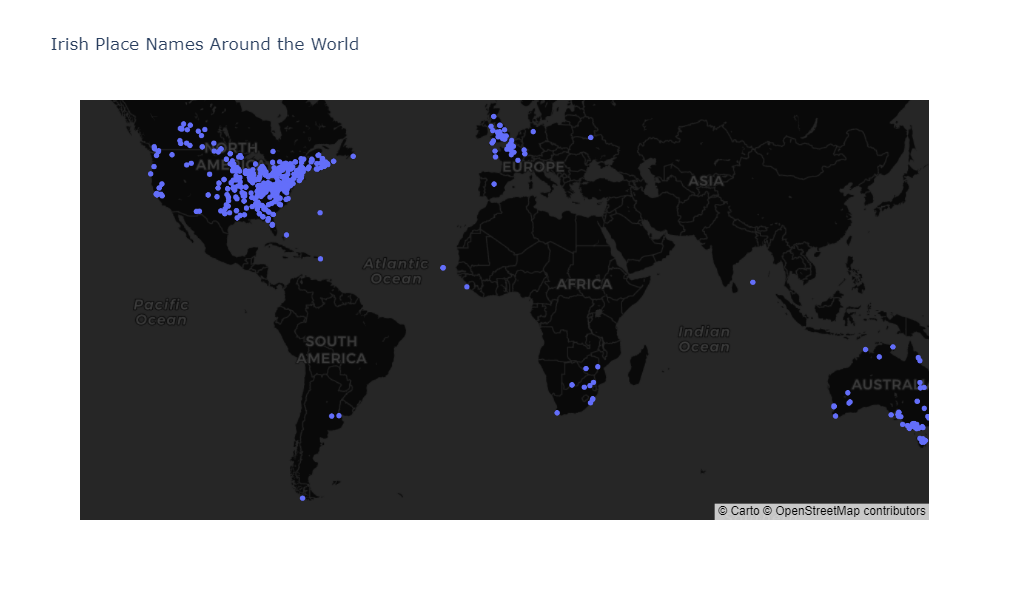

In [47]:
import pandas as pd
import plotly.express as px

# Assume the DataFrame 'valid_coords_df' is already cleaned and contains Latitude and Longitude columns.

# Plot the map with Plotly Express in dark mode
fig = px.scatter_mapbox(
    valid_coords_df,
    lat='Latitude',
    lon='Longitude',
    hover_name='Place Name',  # Show place name on hover
    title="Irish Place Names Around the World",
    zoom=1,  # Initial zoom level
)

# Set the mapbox style to 'dark' for a dark mode map
fig.update_layout(
    mapbox_style="carto-darkmatter",  # Dark mode style
    mapbox=dict(center=dict(lat=0, lon=0), zoom=1),  # Set initial center and zoom level
    height=600  # Set height for the plot
)

# Display the map
fig.show()
